In [111]:
import matplotlib.pyplot as plt # crear graficos
plt.rcParams["figure.figsize"] = (10,5) # cambiar el tamano de las figuras
import seaborn as sns # graficos con dataframes

import numpy as np # manipulacion de vectores
import pandas as pd # manipulacion de dataframes igual R

import statsmodels.api as sm # paquete estadístico parecido a R para modelos estadísticos
from scipy import stats # librerías estadística
import pingouin as pg # test etadísticos
import math # funciones matematicas
from scipy.stats import pearsonr # importar la función pearson
import sklearn.metrics as metrics # métricas de error de modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import plotly.express as px # crear gráficos interactivos

import plotly.figure_factory as ff # crear figuras especiales de plotly

La estadística inferencial nos sirve para poder modelar datos. Es decir, a partir de una muestra, "calcular" reglas generales o modelos estadísticos que nos permitan tomar decisiones basados en conclusiones robustas.

En estadística podemos:
- Comparar
- Relacionar o asociar
- Explicar la causalidad. Es decir, cómo afectan unos factores a una determinada variable o salida de interés.

Todo se basa en modelar los datos utilizando:
- Test estadísticos que nos permiten decidir si las hipótesis son ciertas o no. Los test estadísticos se aplican para comparar o relacionar.
- Modelos estadísticos causales para poder explicar cómo afectan las entradas a la salida.

Lo que vas a aprender con este notebook es realizar:
- Comparaciones de medias: t-test, Wilkoxon, ANOVA y pairwise comparison
- Correlaciones: spearman y pearson
- Asociaciar o comparar proporciones: chi cuadrado
- Modelo de regresión simple (problema de regresión)
- Modelo de regresión múltiple (problema de regresión)
- Modelo logístico (problema de clasificación)

Para ello te los voy a presentar con el mismo ejemplo de carseats:

El set de datos Carseats contiene información sobre la venta de sillas infantiles en 400 tiendas distintas.

Para cada una de las 400 tiendas se han registrado 11 variables.

Se pretende generar un modelo de clasificación que permita predecir si una tienda tiene ventas altas (Sales > 8) o bajas (Sales <= 8) en función de todas las variables disponibles.

En este caso, la variable respuesta o de salida son las ventas y las variables de entrada son aquellas relativas a las ventas como por ejemplo: la edad promedio de la población alrededor de esa tienda, el nivel de estudios, la colocación de los estantes etc...

En este ejemplo podemos enfocar el problema como:

1. Un problema de clasificación binaria donde la variable respuesta es cualitativa, es decir, ventas altas o bajas.
2. Un problema de regresión donde la variable respuesta es cuantitativa, es decir, sales o ventas en millones de dolares.

Vamos primero a calcular la variable respuesta ventas altas o bajas y vamos a ejecutar la descripción de las variables de entrada vs la salida en los dos casos:

In [3]:
# Leemos los datos de carseats
carseats = sm.datasets.get_rdataset("Carseats", "ISLR")
data = carseats.data
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
# Calcular la variable respuesta binaria: ventas altas y bajas: 
data['ventas_altas'] = np.where(data.Sales > 8, 1, 0)

Ahora que ya tienes el problema más estructurado vas a aprender las herramientas inferenciales básicas y poderlas aplicar en tus propios datos.

¡A por ello!

# Introducción a la estadística inferencial. Contraste de hipótesis

En estadística las preguntas se contestan con el método investigativo ligado al contraste de hipótesis.

Se trata de plantear una hipótesis nula y una hipótesis de investigación.

Suponemos que la hipótesis nula la suponemos cierta a priori antes de calcular.

Por ejemplo: si queremos comparar el sueldo promedio entre grupos de personas que tengan estudios primarios y/o bachillerato y/o formación profesional respecto aquellos que tengan carrera o máster o doctorado. Para simplificar definimos:
- Grupo 1: Estudios iniciales
- Grupo 2: Estudios universidad


La hipótesis nula se define como igualdad:

- H0: el sueldo promedio entre las personas con estudios iniciales y estudios de universidad es igual.

Y la hipótesis de investigación o H1 se define como diferencias:

- H1: el sueldo promedio entre las personas con estudios iniciales y estudios de universidad es diferente.


Para decidir si la H0 se puede rechazar como cierta se calcula el p-valor con un test estadístico o técnica estadística.

En este caso podríamos aplicar un t-test para decidir si hay diferencias o no significativas entre el sueldo promedio por grupos de estudios.

Calculamos el test y nos da una significación o p-valor =0.002.

Si el p-valor es más pequeño que un umbral alpha (normalmente el 5%=0.05) podemos rechazar la H0 y quedarnos con la H1.

En este caso nos quedaríamos con la H1 que hay diferencias ya que podemos rechazar la igualdad gracias a la prueba de significación estadística que hemos calculado.

Acabas de descubrir el contraste de hipótesis el uso del p-valor.

A continuación vas a aprender a utilizar este razonamiento para:

- Comparar medias
- Aplicar correlación
- Comparar y asociar proporciones

¡A por ello!


# Comparación de medias

Una de las primeras comprobaciones que podemos hacer es la comparación de medias. Se trata de comparar grupos teniendo en cuenta una variable numérica.

Por ejemplo, comparar si el peso según el género es diferente o no. O si la altura es diferente o no según el género.

Fíjate que en ambos casos utilizamos el peso o altura como variable cuantitativa y el sexo es una variable cualitativa que indica grupos.

En la comparación definimos las hipótesis como:

- H0: no hay diferencias entre el peso en función del género
- H1: hay diferencias significativas entre el peso en función del género

Ahora que ya conoces como se plantea el problema vamos a aprender a calcular el p-valor en diferentes casos.

Los ejemplos que vas a ver son suponiendo normalidad en los grupos y por ello podemos utilizar los test paramétricos.

Es un pequeño ejercicios para entender cómo se calcula y cómo se interpreta los resultados.

Si quieres ver más detalles sobre de toda la matemática te dejo aquí los enlaces:

- Artículo sobre ANOVA --> https://www.cienciadedatos.net/documentos/19_anova
- Artículo sobre t-test --> https://www.cienciadedatos.net/documentos/pystats10-t-test-python.html

## T-test. Comparación dos grupos

Link ejemplo t-test: https://www.cienciadedatos.net/documentos/pystats10-t-test-python.html

Vamos a comparar si hay ventas altas o no según el precio promedio de las productos de las tiendas.

Podemos definir las siguientes hipótesis:

- H0: el precio promedio del producto es igualdad en las tiendas de ventas bajas y de ventas altas
- H1: el precio promedio del producto es diferente en las tiendas de ventas bajas y de ventas altas

Vamos a "contestar" estas hipótesis utilizando el t-test:

In [8]:
# T-test dos medias
# Test para grupos independientes (p-value, intervalos de confianza)
# ==============================================================================
precio_ventas_bajas = data.loc[data["ventas_altas"] == 0, 'Price']
precio_ventas_altas = data.loc[data["ventas_altas"] == 1, 'Price']

pg.ttest(x=precio_ventas_bajas, y=precio_ventas_altas, alternative='two-sided', correction=False)

T  dof alternative         p-val           CI95%   cohen-d  \
T-test  7.324572  398   two-sided  1.342407e-12  [12.12, 21.02]  0.744619   

            BF10  power  
T-test  4.97e+09    1.0

Fíjate que el p-valor es muy pequeño (casi zero).

Eso quiere decir que tenemos diferentes significativas en el precio del producto en los grupos de tiendas con ventas altas y ventas bajas.

¡Genial!

Podemos acompañar el cálculo con un gráfico y el cálculo de las medias por grupos:

In [11]:
# calcular el IC confianza de la media por grupos - https://stackoverflow.com/questions/53519823/confidence-interval-in-python-dataframe


# import math

df=data.copy()

stats = df.groupby(['ventas_altas'])['Price'].agg(['mean', 'count', 'std'])
print(stats)
print('-'*30)

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                    mean  count        std
ventas_altas                              
0             122.588983    236  21.516459
1             106.018293    164  23.276011
------------------------------
                    mean  count        std     ci95_hi     ci95_lo
ventas_altas                                                      
0             122.588983    236  21.516459  125.334163  119.843803
1             106.018293    164  23.276011  109.580693  102.455893


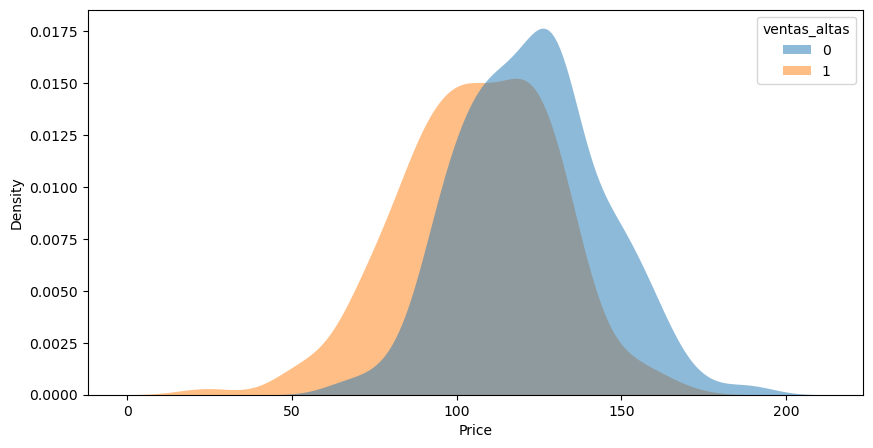

In [12]:
# Histograma de densidad de un factor
x = "Price" # selecciona la variable numérica
y = "ventas_altas" # selecciona la variable cualitativa o factor

sns.kdeplot(
    data=data, x=x, hue=y,
    fill=True, common_norm=False,
    alpha=.5, linewidth=0)
plt.show()

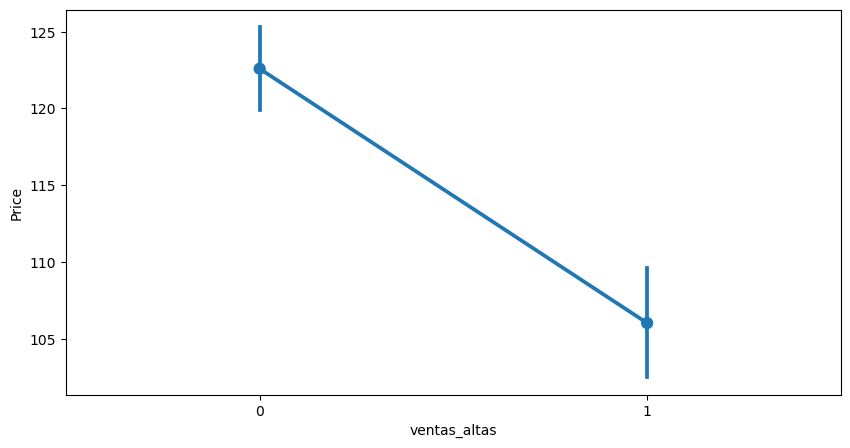

In [13]:
# Diagramas de error o de medias de un factor. Muestra la media y el intervalo de confianza de la media

x = "Price" # selecciona la variable numérica
y = "ventas_altas" # selecciona la variable cualitativa o factor

sns.pointplot(x=y, y=x, data=data)
plt.show()

Según la descriptiva podemos ver que el grupo con ventas altas tiene valores de precio del producto más elevado que el grupo de ventas altas.

¡Ya tenemos la conclusión!

## ANOVA comparación de más de dos grupos y pairwise comparison

Link ejemplo anova: https://www.cienciadedatos.net/documentos/pystats09-analisis-de-varianza-anova-python.html

En este ejemplo queremos comparar si las ventas en miles de USD (sales) son diferentes o no según la posición de los estantes.

En este caso ya no tienes dos grupos como en ejemplo anterior, sino que tenemos tres grupos:

La posición de los estantes es ShelveLoc y tiene tres grupos: Bad, medium, good. No podemos utilizar el t-test ya que es para dos grupos, necesitamos utilizar el ANOVA que es la técnica que se utiliza para tres o más grupos:

Podemos definir las siguientes hipótesis en el ANOVA:

- H0: las ventas son iguales en los tres grupos de localización de los estantes
- H1: las ventas son diferentes entre algunos de los grupos de la locación de los estantes

Vamos a "contestar" estas hipótesis utilizando el t-test:

Empezamos haciendo una mini descriptiva:

In [16]:
# Número de observaciones por grupo
# ==============================================================================
data.groupby('ShelveLoc').size()

ShelveLoc
Bad        96
Good       85
Medium    219
dtype: int64

In [19]:
# Média y desviación típica por grupo
# ==============================================================================
data.groupby('ShelveLoc').agg(['mean', 'std'])

Sales             CompPrice                Income             \
                mean       std        mean        std       mean        std   
ShelveLoc                                                                     
Bad         5.522917  2.356349  124.010417  15.181356  72.239583  26.908713   
Good       10.214000  2.501243  125.752941  14.977686  67.976471  28.314970   
Medium      7.306575  2.266373  125.095890  15.583599  67.351598  28.310688   

          Advertising            Population                   Price  \
                 mean       std        mean         std        mean   
ShelveLoc                                                             
Bad          6.218750  6.463180  275.291667  147.233571  114.270833   
Good         7.352941  6.802846  267.047059  127.253581  117.882353   
Medium       6.538813  6.680253  259.401826  154.877765  115.652968   

                            Age             Education           ventas_altas  \
                 std       mean        std       mean       std         mean   
ShelveLoc                                                                      
Bad        23.779460  52.052083  17.405002  13.958333  2.587080     0.145833   
Good       25.128911  52.611765  15.428093  13.752941  2.576939     0.776471   
Medium     23.098674  54.155251  15.969398  13.931507  2.661286     0.383562   

                     
                std  
ShelveLoc            
Bad        0.354792  
Good       0.419083  
Medium     0.487367

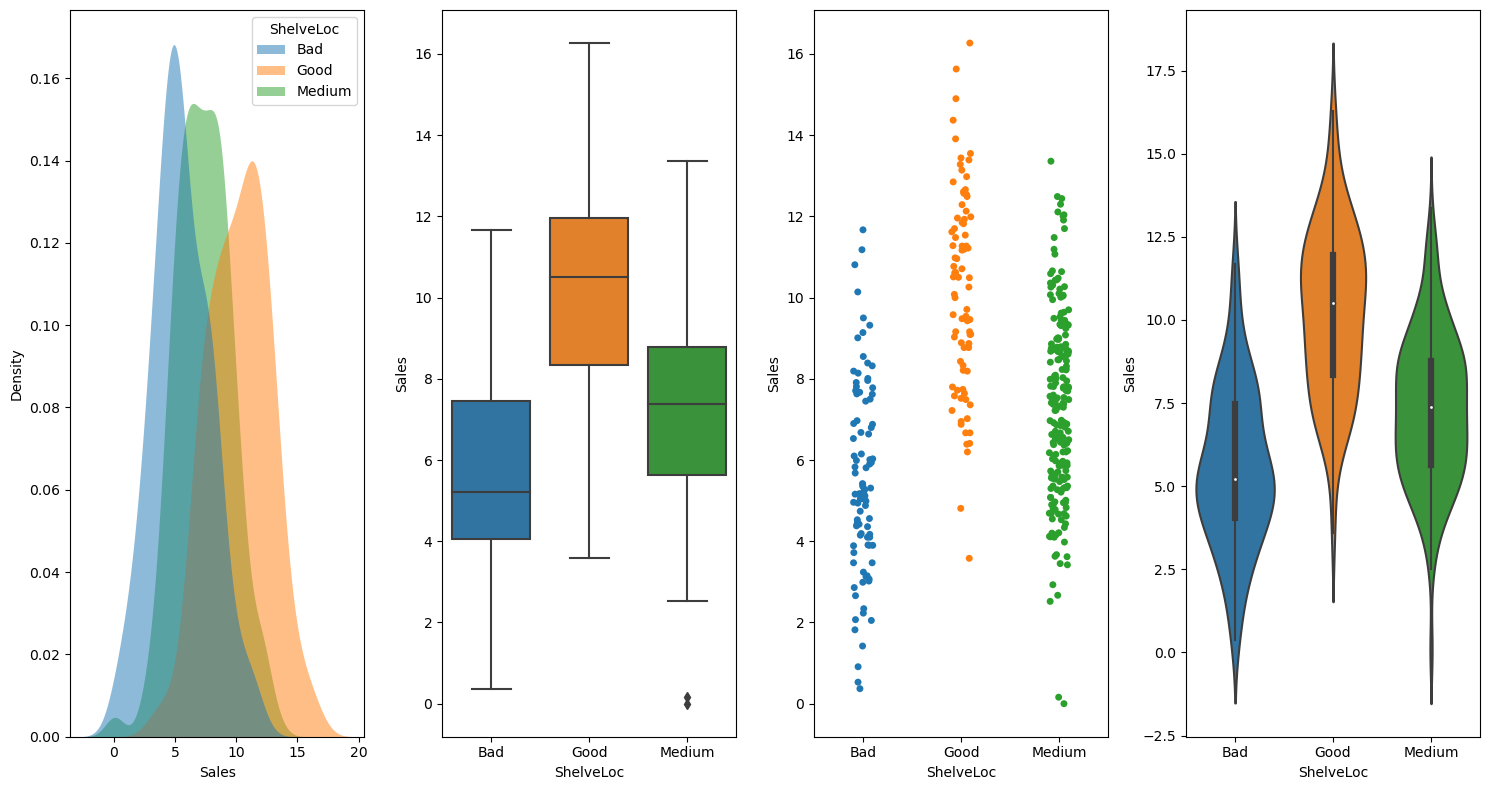

In [20]:
# Varios plots a la vez de un factor:

x = "Sales" # selecciona la variable numérica
y = "ShelveLoc" # selecciona la variable cualitativa o factor

fig, axs = plt.subplots(ncols=4, figsize=(15, 8))
sns.kdeplot(
    data=data, x=x, hue=y,
    fill=True, common_norm=False,
    alpha=.5, linewidth=0, ax=axs[0])
sns.boxplot(data=data, y=x, x=y,ax=axs[1])
sns.stripplot(y= x,data=data, x =y,ax=axs[2])
sns.violinplot(data=data, y=x, x=y,ax=axs[3])
fig.tight_layout()
plt.show()

Según la descriptiva podemos intuir que las ventas son más altas en el grupo de Good que no de Bad o Medium.

La descriptiva nos da pistas de lo que pasa :)

In [22]:
# ANOVA
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
pg.anova(data=data, dv='Sales', between='ShelveLoc', detailed=True)

Source           SS   DF          MS          F         p-unc       np2
0  ShelveLoc  1009.531143    2  504.765571  92.229905  1.266936e-33  0.317236
1     Within  2172.743555  397    5.472906        NaN           NaN       NaN

El p-valor aquí es p-unc = 1.266936e-33 --> 0

Podemos rechazar la hipótesis nula y quedarnos con la hipótesis alternativa.

Es decir, hay diferencias en algún grupo.

Pero... entre qué grupos hay diferencias. Para contestar ello podemos utilizar la comparación por parejas:

In [24]:
# Pairwise comparison
# Post-hoc Tukey test
# ==============================================================================
pg.pairwise_tukey(data=data, dv='Sales', between='ShelveLoc').round(3)

A       B  mean(A)  mean(B)   diff     se       T  p-tukey  hedges
0   Bad    Good    5.523   10.214 -4.691  0.348 -13.464      0.0  -1.997
1   Bad  Medium    5.523    7.307 -1.784  0.286  -6.229      0.0  -0.761
2  Good  Medium   10.214    7.307  2.907  0.299   9.725      0.0   1.240

Si te fijas en las filas, la columna A y B nos indica la comparación de las parejas de grupos y nos calcula el p-valor en la columna p-tukey.

Cada fila tiene un contraste de hipótesis.

En la primera fila dónde comparamos Bad con Good nos damos cuenta que tenemos medias diferentes y además con p-valor más pequeño que el 0.05 por ello podemos decir que hay diferencias significativas entre el grupo Bas y grupo Good.

Y además, vemos que en el grupo Good las ventas son significativamente más altas.

Este razonamiento es aplicable a cada fila.

Ahora ya sabemos que hay diferecias entre todos los grupos entre ellos ya que el p-valor es significativo (menor que el 0.05) en todas las comparaciones por parejas que estamos haciendo el test pairwise.

# Correlación

La correlación también la podemos calcular de manera estadística con el p-valor y contestar a las hipótesis.

En el caso de la correlación o la asociación entre dos medidas también se pueden definir las hipótesis:

Por ejemplo: queremos relacionar el peso con el consumo de modelos de coche, entonces las hipótesis se puede definir como:

- H0: el consumo y el peso no están relacionados o asociados
- H1: el consumo y el peso están asociados o relacionados

¡Vamos a ver cómo se contesta en la práctica!

Podemos utilizar principalmente tres coeficientes de correlación.

El coeficiente de Pearson, coeficiente de Spearman o el coeficiente de Kendall.
- El de Pearson se utiliza cuando las variables son normales
- El de Spearman cuando alguna no lo es.
- El de Kendall cuando las dos variables son ordinales

Los tres coeficientes mide la asociación positiva o negativa.
Toman valores entre [-1, +1], siendo +1 una correlación lineal positiva perfecta y -1 una correlación lineal negativa perfecta.


Link de ejemplo de correlación: https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html

Vamos a relacionar las ventas con el precio.

Empezamos aplicando la descriptiva e intuimos una correlación negativa.

Es decir, cuando aumentamos el valor del precio disminuyen las ventas y viceversa.


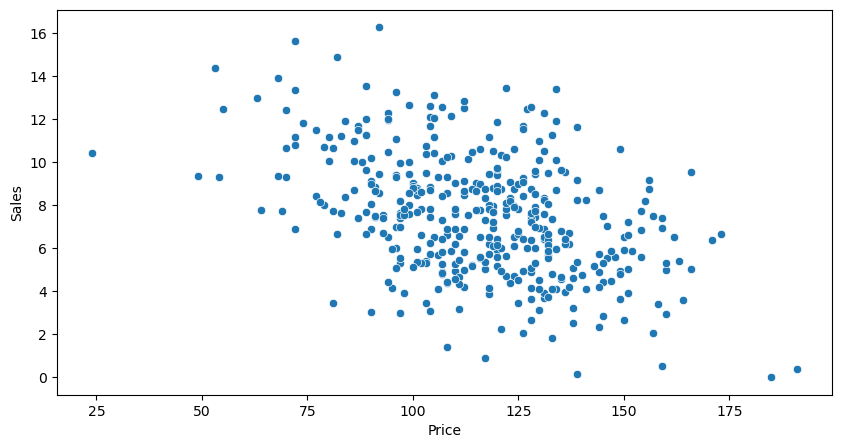

In [31]:
# Diagramas de dispersión 2D

x = 'Price'
y = 'Sales'


# seaborn
sns.scatterplot(data=data, x=x, y=y)
plt.show()


# plotly
fig = px.scatter(data,x=x,y=y)
fig.show()

In [ ]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', data['Sales'].corr(data['Price'], method='pearson'))
print('Correlación spearman: ', data['Sales'].corr(data['Price'], method='spearman'))
print('Correlación kendall: ', data['Sales'].corr(data['Price'], method='kendall'))

In [29]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(data['Sales'], data['Price'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data['Sales'], data['Price'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data['Sales'], data['Price'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=-0.4449507278465726, p-value=7.61818701191294e-21
Correlación Spearman: r=-0.4076074214905194, p-value=1.9201494808156024e-17
Correlación Pearson: r=-0.27985434967985917, p-value=1.0054515025424865e-16


El p-valor es signifivo en los tres coeficientes.

Nos quedamos con la hipótesis de que hay correlación o asociación entre el precio y las ventas.


#  Chi cuadrado. Asociación / comparación de proporciones

Ahora es el turno de comparar y asociar proporciones en un mismo test.

El test de chi cudrado nos permite comparar las proporciones entre dos variables cualtitativas.

Por ejemplo, vamos a comparar el grupo de ventas altas y bajas con la variable ShelveLoc (localización de los estantes).

Ambas variables son cualitativas y queremos comparar las proporciones.

Es decir, queremos ver si la distribución de proporciones del grupo de ventas altas es igual o diferente a la distribución de proporciones de ventas bajas.

Empezamos a describir y lo verás más claro:

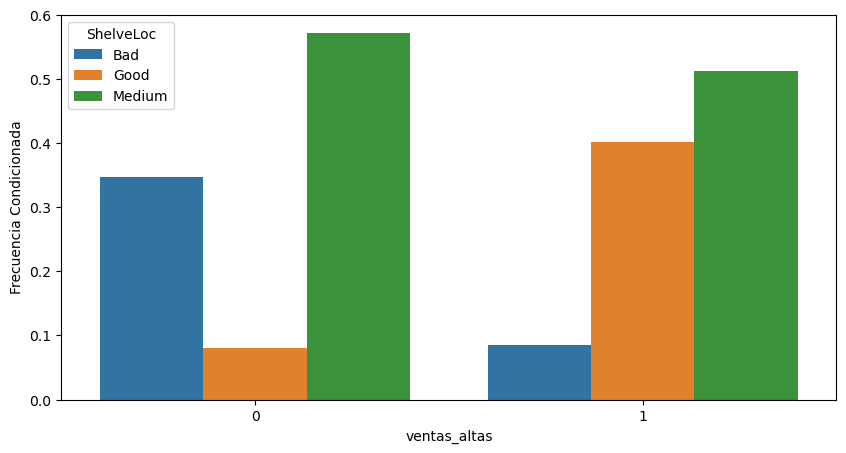

ventas_altas ShelveLoc  Frecuencia Condicionada
0             0       Bad                 0.347458
1             0      Good                 0.080508
2             0    Medium                 0.572034
3             1       Bad                 0.085366
4             1      Good                 0.402439
5             1    Medium                 0.512195

In [32]:
# Diagramas de barras de dos factores de frecuencias condicionadas a los grupos de la variable x

x = 'ventas_altas'
y = 'ShelveLoc'


pct2 = (data.groupby([x,y]).size() / data.groupby([x]).size()).reset_index().rename({0:'Frecuencia Condicionada'}, axis=1)


# seaborn
sns.barplot(x=x, hue=y, y='Frecuencia Condicionada', data=pct2)
plt.show()

pct2

Para el grupo de ventas_altas = 0 tenemos un reparto de proporciones:
    
    34.7% BAD
    8% GOOD
    57.3% MEDIUM
    
Y paa el grupo de ventas_altas = 1 tenemos un reparto de proporciones:

    8.5% BAD
    40.2% GOOD
    51.1% MEDIUM
    
Fíjate que el reparto es diferente en proporciones.
Queremos contestar esto con el test de Chi Cuadrado y ver si:

- H0: hay igualdad entre las proporciones de un grupo y el otro
- H1: hay diferencias entre las proporciones de un grupo y otro

El test de Chi Cuadrado también mide la asociación entre las dos variables asi que también existen las hipótesis:

- H0: ventas_altas no está relacionada con ShelveLoc
- H1: ventas_altas está relacionada con ShelveLoc

Mire comparación y relación en un mismo test.

Vamos a aplicarlo:

Link ejemplo de Chi Cuadrado: https://towardsdatascience.com/chi-square-test-for-independence-cf2f5057cc35

In [34]:
# Chi Cuadrado
valores_esperados, valores_observados, stats = pg.chi2_independence(data,x='ventas_altas',y='ShelveLoc')

In [35]:
valores_esperados

ShelveLoc       Bad   Good  Medium
ventas_altas                      
0             56.64  50.15  129.21
1             39.36  34.85   89.79

Son las frecuencias absolutas que esperaríamos si no hubiese relación entre ambas variables

En cambio, en nuestra muestra de datos obseramos esta tabla:

In [36]:
valores_observados

ShelveLoc     Bad  Good  Medium
ventas_altas                   
0              82    19     135
1              14    66      84

Si te fijas en ambas tablas ves diferencias entre valores observados y valores esperados.

En este caso, los residuos O = valores_esperados - valores_observados

In [37]:
valores_esperados-valores_observados

ShelveLoc       Bad   Good  Medium
ventas_altas                      
0            -25.36  31.15   -5.79
1             25.36 -31.15    5.79

Aquí puedes ver en qué celdas o parejas de grupos hay más desajuste y en qué sentido.

Estos residuos cuando se estandarizan son los que usa la fórmula para calcular el estadístico Chi Cuadrado y finalmente el p-valor.



In [38]:
stats

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000   75.518411  2.0  3.993792e-17  0.434507   
1        cressie-read  0.666667   76.132457  2.0  2.937968e-17  0.436270   
2      log-likelihood  0.000000   79.787935  2.0  4.723567e-18  0.446620   
3       freeman-tukey -0.500000   85.021391  2.0  3.450162e-19  0.461035   
4  mod-log-likelihood -1.000000   92.939043  2.0  6.584809e-21  0.482024   
5              neyman -2.000000  120.199757  2.0  7.924182e-27  0.548178   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Puedes ver como el p-valor en el de pearson que es el más común de los cálculos de los residuos es significativo y por ello nos quedamos que hay diferencias entre las proporciones de un grupo y otro y además que hay relación entre las variables de Sales y ShalveLoc

# Modelo de regresión simple

Si hasta ahora hemos contesta comparaciones y relaciones.

Es el momento de contestas la causalidad.

La causalidad es propia de los modelos y es propia también de las funciones matemáticas.

Te invito a que leas primero este ejemplo: https://conceptosclaros.com/que-es-modelo-matematico/

De esta manera vas a entender mejor qués es un modelo estadístico y por consecuencia la causalidad.

Si, si... lee primer el artículo y después vuelve aquí:

En este ejemplo vamos a calcular si las ventas Sales se pueden explicar por el precio promedio del producto.

De forma descriptiva sería esto:

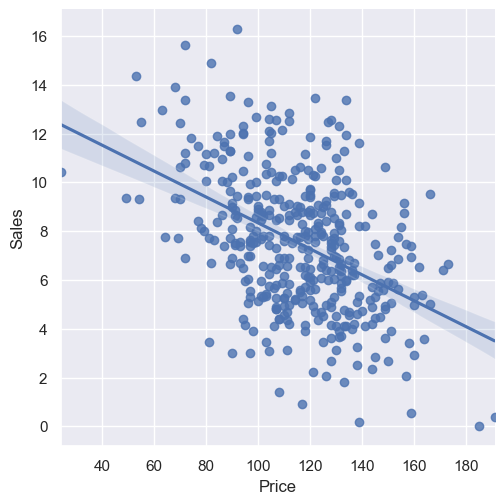

In [41]:
# Scatterplot 2d con linea de tendencia por grupos

x = "Price" # variable numérica eje horizontal
y = "Sales" # variable numérica eje vertical

sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data,
    x=x, y=y,
    height=5
)
plt.show()

Es decir, Sales en función de Price o lo que es lo mismo:

Sales = f(Price)

Vamos a calcular esa recta lineal o función matemática que explique las Sales en función del Price:

Ejemplos de regresión lineal simpe: https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

In [42]:
# Definimos primero la matriz de entrada y la variable de salida:

y = data['Sales']
X = data['Price']

In [43]:
# Regresión lineal Simple
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_ = sm.add_constant(X, prepend=True)
modelo = sm.OLS(endog=y, exog=X_)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           7.62e-21
Time:                        10:37:19   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.0

Si observas en la tabla podemos ver la fórmula de linea recta gracias a los coeficientes:

La fórmula es:

    Sales = 13.6419 - 0.0531 * Price

Es decir, que a mayor Price menor son las ventas ya que el coeficiente es negativo.

¡Maravilloso!

Además me permite estimar las ventas de una tienda según el precio que tenga esa tienda.

Por ejemplo si tenemos una tienda con Price = 150 las Sales serán:

In [44]:
13.6219-0.0531*150

5.6569

De hecho podemos calcular los valores predichos por el modelo o estimados por el modelo:

Podemos montar un data frame con los valores estimados, los valores reales y el error

In [46]:
valores_estimados = modelo.predict()

In [48]:
resultados_modelo = pd.DataFrame(valores_estimados)
resultados_modelo.columns = ['Valores Estimados']
resultados_modelo['Valores Reales'] = y
resultados_modelo['Residuo'] = resultados_modelo['Valores Reales']-resultados_modelo['Valores Estimados']
resultados_modelo.head()

Valores Estimados  Valores Reales   Residuo
0           7.273153            9.50  2.226847
1           9.236855           11.22  1.983145
2           9.396074           10.06  0.663926
3           8.493832            7.40 -1.093832
4           6.848569            4.15 -2.698569

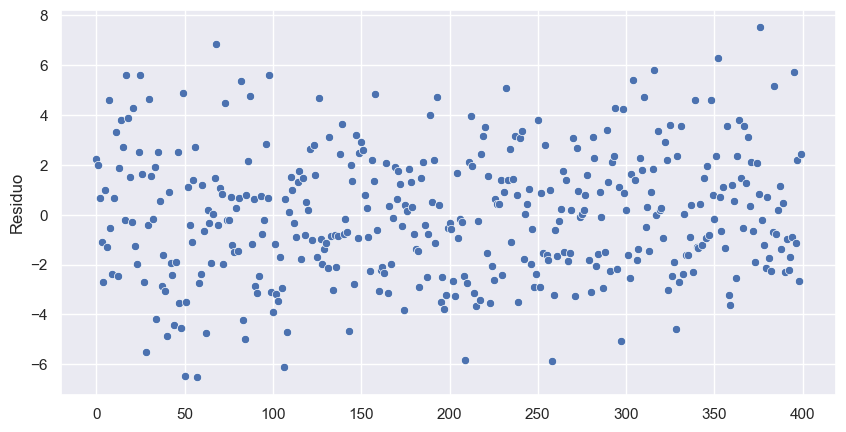

In [52]:
sns.scatterplot(data=resultados_modelo, x = np.arange(len(resultados_modelo)),y="Residuo")
plt.show()

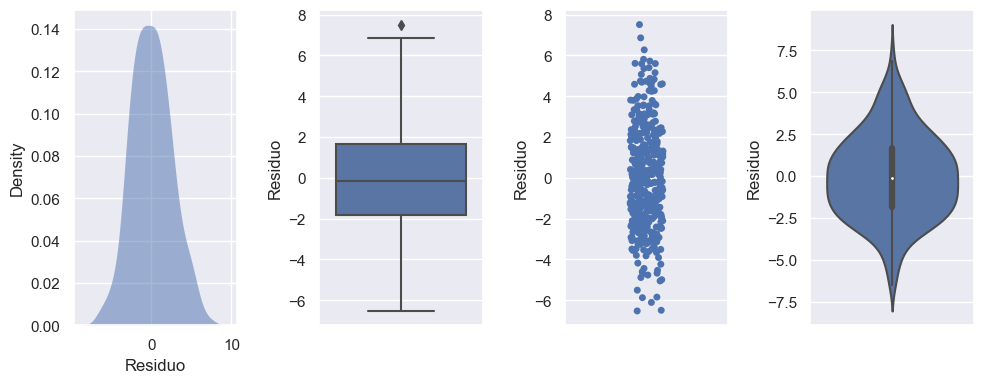

In [53]:

# Descrpcion de una variable cuantitativa: "residuos"
df = resultados_modelo
fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
# Histograma de densidad
sns.kdeplot(
    data=df, x='Residuo',
    fill=True, common_norm=False, palette="crest",
    alpha=.5, linewidth=0, ax=axs[0])
# Boxplot
sns.boxplot(data=df, y='Residuo',ax=axs[1])
# Stripchart
sns.stripplot(y= 'Residuo',data=df,ax=axs[2])
# Violinplot
sns.violinplot(data=df, y='Residuo',ax=axs[3])
fig.tight_layout()
plt.show()

En general, para que un modelo sea válido los residuos tienen que ser normales.

Y digo, en general. Es una manera bastante usada para decidir si tus modelo le falta información.


Otra manera es mirar los p-valores de los coeficientes en este caso los p-valores se encuntran el la columna P>|t|

In [57]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           7.62e-21
Time:                        10:48:51   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.0

Podemos decir que el modelo es correcto pero ...

¿Qué pasa con otras variables?

¿Sería bueno introducir más variables?

Llega el momento del modelo de regresión múltiple:

# Modelo de regresión múltiple. Problema de regresión

El siguiente paso es seleccionar algunas variables que creemos que pueden ser interesantes para el modelo y añadirlas a la ecuación.

Para simplificar el ejemplo vamos a trabajar con aquellas variables numéricas que tenemos correlación:

In [58]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'ventas_altas'],
      dtype='object')

In [71]:
# Seleccionamos las variables numéricas y la respuests:
var_num = ['Sales','CompPrice', 'Income', 'Advertising', 'Population', 'Price','Age', 'Education']
X_num_tot = data[var_num]

In [80]:
# Correlacion en valor absoluta de la variable de salida
cor = X_num_tot.corr(method = 'spearman')
cor_target = pd.DataFrame(abs(cor['Sales']))
cor_target = cor_target.sort_values(by = 'Sales',ascending = 0)
cor_target

Sales
Sales        1.000000
Price        0.407607
Advertising  0.275396
Age          0.236344
Income       0.155368
CompPrice    0.067639
Population   0.041937
Education    0.034474

In [82]:
cor_target.index

Index(['Sales', 'Price', 'Advertising', 'Age', 'Income', 'CompPrice',
       'Population', 'Education'],
      dtype='object')

En la tabla anterior vemos que algunas de las variables tienen correlación muy baja. Podríamos eliminar, Income, CompPrice, Population, Education

In [83]:
# Definimos primero la matriz de entrada y la variable de salida:

y = data['Sales']
X = data[['Price', 'Advertising', 'Age']]

In [84]:
# Regresión lineal múltiple
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_ = sm.add_constant(X, prepend=True)
modelo = sm.OLS(endog=y, exog=X_)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     74.10
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           4.63e-38
Time:                        11:11:51   Log-Likelihood:                -893.24
No. Observations:                 400   AIC:                             1794.
Df Residuals:                     396   BIC:                             1810.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.0035      0.719     22.266      

Todas las variables son significativas con la salida, vamos a comprobar los residuos:

In [85]:
valores_estimados = modelo.predict()
resultados_modelo = pd.DataFrame(valores_estimados)
resultados_modelo.columns = ['Valores Estimados']
resultados_modelo['Valores Reales'] = y
resultados_modelo['Residuo'] = resultados_modelo['Valores Reales']-resultados_modelo['Valores Estimados']
resultados_modelo.head()

Valores Estimados  Valores Reales   Residuo
0           8.342738            9.50  1.157262
1           9.981841           11.22  1.238159
2           9.710365           10.06  0.349635
3           8.180637            7.40 -0.780637
4           7.089049            4.15 -2.939049

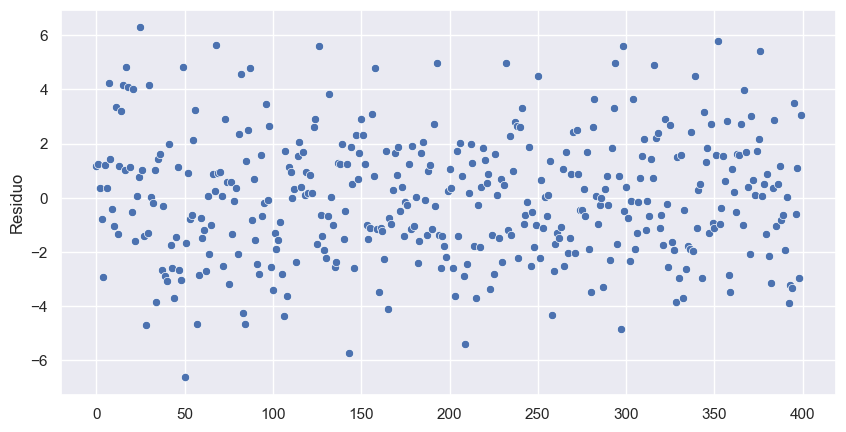

In [86]:
sns.scatterplot(data=resultados_modelo, x = np.arange(len(resultados_modelo)),y="Residuo")
plt.show()

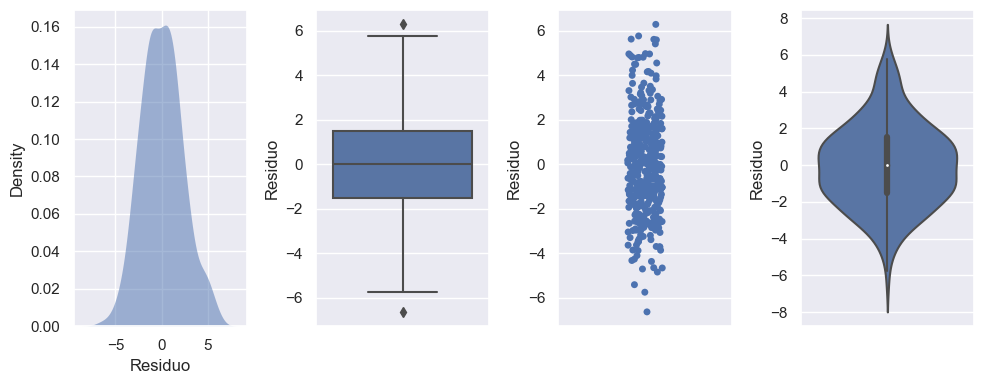

In [87]:

# Descrpcion de una variable cuantitativa: "residuos"
df = resultados_modelo
fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
# Histograma de densidad
sns.kdeplot(
    data=df, x='Residuo',
    fill=True, common_norm=False, palette="crest",
    alpha=.5, linewidth=0, ax=axs[0])
# Boxplot
sns.boxplot(data=df, y='Residuo',ax=axs[1])
# Stripchart
sns.stripplot(y= 'Residuo',data=df,ax=axs[2])
# Violinplot
sns.violinplot(data=df, y='Residuo',ax=axs[3])
fig.tight_layout()
plt.show()

Son residuos bastante normales y además los coeficientes son significativos.

¡Tenemos un modelo válido para usarlo!

Ahroa bien, ¿es un modelo potente para predecir?

¿Qué error comento en promedio?

Las métricas para saber si un modelo de regresión es bueno o no son:
- RMSE - root mean square error
- MAE - mean absolute error
- R2 - coeficiente de determinación

In [88]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     74.10
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           4.63e-38
Time:                        11:16:52   Log-Likelihood:                -893.24
No. Observations:                 400   AIC:                             1794.
Df Residuals:                     396   BIC:                             1810.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.0035      0.719     22.266      0.000      14.590      17.417
Price          -0.0580      0.005    -12.022      0.000      -0.068      -0.049
Advertising     0.1231      0.017      7.201      0.000       0.089       0.157
Age            -0.0488      0.007     -6.931      0.000      -0.063      -0.035
==============================================================================
Omnibus:                        2.431   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                2.489
Skew:                           0.186   Prob(JB):                        0.288
Kurtosis:                       2.893   Cond. No.                         821.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
y_pred = modelo.predict()
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,y_pred)
print("MAE:",mae)
#print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 1.8154927719205844
RMSE: 2.2572604872398245
R-Squared: 0.35954932981031396


R2 nos indica que el modelo no es muy bueno ya que lo ideal es estar en valores en torno al 0.7 hacia arriba.

Tenemos un modelo pobre que comete errores de predicción. El siguiente paso sería añadir otras variables que nos puedas dar más información acerca de la variable Sales.

Te lo dejo para ti :)

# Modelo logístico. Problema de clasificador binario

La última técnica que vamos a ver es el modelo logístico.

El modelo logístico funciona como un modelo de regresión, es decir, tenemos variables de entrada y variable de salida que queremos explicar.

La estructura es la misma pero en lugar de utilizar una variable de salida que es cuantitativa utilizaremos una variable de salida es una varible binaria, es decir, si o no.

Por ejemplo, la variable ventas_altas.

En este caso atacamos un problema clasificador ya que lo que queremos es clasificar entre el grupo 0 = ventas bajas o el grupo 1 = ventas_altas

- Léete este artículo: https://conceptosclaros.com/que-es-regresion-logistica/
- Y este otro: https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html

¡Vamos a ver cómo proceder en Python y las métricas que hay!

Vamos a empezar con una regresión logística simple poniendo:
- Variable de entrada = Price
- Variable de salida = ventas_altas

In [98]:
# Regresión logística simple
y = data['ventas_altas']
X = data['Price']

# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
X_ = sm.add_constant(X, prepend=True)
modelo = sm.Logit(endog=y, exog=X_)
modelo = modelo.fit()
modelo.summary()

Optimization terminated successfully.
         Current function value: 0.613395
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           ventas_altas   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jun 2022   Pseudo R-squ.:                 0.09376
Time:                        11:38:24   Log-Likelihood:                -245.36
converged:                       True   LL-Null:                       -270.74
Covariance Type:            nonrobust   LLR p-value:                 1.038e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5228      0.605      5.823      0.000       2.337       4.709
Price         -0.0340      0.005     -6.470      0.000      -0.044      -0.024
==============================================================================
"""

¡Los coeficientes son significativos!

Podemos predecir los resultados del modelo:

In [100]:
prob_modelo = modelo.predict()

In [103]:
prob_modelo[:5] # las primeras 5 probabilidades

array([0.36488354, 0.66882037, 0.69099613, 0.55655715, 0.30448468])

El modelo nos da las probabilidades de estar en el grupo 1.
En la primera tienda tiene una probabilidad de 36.5% de estar en el grupo 1. Lo más lógico aquí es clasificar la tienda en el grupo 0 ya que no pasa el umbral del 50%.

Asi que para cada tienda tenemos la probabilidad de estar el grupo 1.

In [106]:
(prob_modelo>0.5)[:5]

array([False,  True,  True,  True, False])

Poniendo el umbral al 50% vemos que la primera tienda sería el grupo 0, la segunda, tercera y cuarta sería del grupo 1 y la quinta del grupo 0.


In [108]:
# Clasificación predicha
# ==============================================================================
clasificacion = np.where(prob_modelo<0.5, 0, 1)
clasificacion[:5]

array([0, 1, 1, 1, 0])

Podemos montar un data frame con las predicciones en probabilidad en grupo y los valores reales:

In [109]:
resultados_modelo = pd.DataFrame(prob_modelo)
resultados_modelo.columns = ["Probabilidad Predicha"]
resultados_modelo["Clasificacion Predicha"] = clasificacion
resultados_modelo["Claificacion Real"] = y
resultados_modelo.head(20)

Probabilidad Predicha  Clasificacion Predicha  Claificacion Real
0                0.364884                       0                  1
1                0.668820                       1                  1
2                0.690996                       1                  1
3                0.556557                       1                  0
4                0.304485                       0                  0
5                0.745847                       1                  1
6                0.463434                       0                  0
7                0.364884                       0                  1
8                0.334004                       0                  0
9                0.334004                       0                  0
10               0.531278                       1                  1
11               0.581547                       1                  1
12               0.250146                       0                  0
13               0.645869                       1                  1
14               0.380770                       0                  1
15               0.202679                       0                  1
16               0.446585                       0                  0
17               0.283339                       0                  1
18               0.770738                       1                  1
19               0.357047                       0                  1

De esta manera podemos calcular el error de predicción del modelo:

In [113]:
print('Predicción de Validación:')
y_modelo = resultados_modelo["Clasificacion Predicha"]
y_real = y
print(accuracy_score(y_real, y_modelo))
print(confusion_matrix(y_real, y_modelo))
print(classification_report(y_real, y_modelo))

Predicción de Validación:
0.655
[[190  46]
 [ 92  72]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       236
           1       0.61      0.44      0.51       164

    accuracy                           0.66       400
   macro avg       0.64      0.62      0.62       400
weighted avg       0.65      0.66      0.64       400



En este caso tenemos un accuracy o acierto del 65%.

Es un valor relativamente bajo ya que el azar está al 50%

Lo ideal es estar a partir del 80%.

El siguiente paso natural es añadir más variables que nos ayuden a explicar el modelo y calcular una regresión logística múltiple.

# Ejercicios de la lección:

¡Vamos a practicar lo que acabamos de aprender con python!

Para ello, te invito a que uses un dataset de kaggle sobre https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Esta es la información del dataset:

Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information

    1) id: unique identifier
    2) gender: "Male", "Female" or "Other"
    3) age: age of the patient
    4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    6) ever_married: "No" or "Yes"
    7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    8) Residence_type: "Rural" or "Urban"
    9) avg_glucose_level: average glucose level in blood
    10) bmi: body mass index
    11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
    12) stroke: 1 if the patient had a stroke or 0 if not
   

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



**Los ejercicios:**

Recuerda: en todos los ejercicios acompaña con gráficos las respuestas:

    1- Lee la tabla de datos stroke
    2- Compara las medias de la age con la variable stroke con el t-test y ANOVA
    3- Compara el avg_glucose_level en función de smoking_status
    4- Relaciona la av_glucose_level con la age
    5- Compara las proporciones de hypertension con stroke
    6- Calcula un modelo regresión con la variable avg_glucose_level como salida y poniendo la variable age como entrada
    7- Calcula un modelo de clasificación logístico con la variable de salida stroke en función de aquellas que consideres de entrada que puedan afectar
    